# 인스타로 맛집 크롤링하기

## 로그인 후 해당 해시태그의 게시물로 이동하기

In [ ]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [ ]:
# 필요 패키지 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 웹 드라이버 실행
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 제주도맛집이라는 키워드로 인스타그램 검색결과를 확인하는 URL 확인
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [ ]:
# 첫번째 게시글을 찾아 클릭하여 열어보기
def select_first(driver):
    # F12를 통해 개발자 도구 페이지로 가서 class명이 '_aagu'인 부분을 살펴보면 게시글에 해당된다
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
select_first(driver)

* 개발자 도구의 태그명은 자주 바뀌므로 크롤링 시에 오류가 난다면 태그가 바뀌었을 가능성이 많다.

* 위의 방법은 로그인을 일일히 해야하며, 그 이후 자신의 피드로 리다이렉트된다는 번거로움 존재, 아래와 같은 방법을 사용하여 처음부터 로그인을 하고 인스타 크롤링을 진행한다.

In [1]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


# 크롬 드라이버를 로드
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 로그인 페이지로 이동
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

# 사용자 이름과 비밀번호를 입력
username = driver.find_element(By.NAME, 'username')
password = driver.find_element(By.NAME, 'password')
username.send_keys('chuncm@naver.com')
password.send_keys('970dnswjsqud0402!')

# 로그인 버튼을 클릭
login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
login_button.click()
time.sleep(5)

word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\921766561.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [3]:
# 클릭하면 첫번째 게시글로 이동하기
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [4]:
# 패키지 불러오기
import re
from bs4 import BeautifulSoup

## 맛집 크롤링

In [5]:
# 맛집 크롤링
def get_content(driver):
    # 현재 페이지 html정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문내용 가져오기
    try:
        # 태그명이 div, class명이 _a9zs인 태그 아래에 있는 span태그를 모두 선택하고,
        # 그 중 첫 번째 태그를 선택하여, 해당 태그의 텍스트 부분을 추출
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    # 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    # #으로 시작하여, #뒤에 연속된 문자(공백이나 #, \기호가 아닌 경우)를 모두 찾아서 리스트 형태로 저장
    tags = re.findall(r'#[^\s\<]+', content)
    
    # 날짜(작성일자) 정보 가져오기
    # 태그명이 time, class명이 _aaqe인 태그를 모두 선택하고
    # 그 중 첫번째 태그를 선택한 뒤, 해당 태그의 datetime 속성값의 0~9번째 글자 슬라이싱
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    # 좋아요 수 가져오기
    try:
        # 태그명이 div, class명이 다음과 같은 태그 바로 아래에 있는 span태그 모두 선택
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    # 위치(장소)정보 가져오기
    try:
        # div태그 중 class명이 _aaqm인 것을 선택해 화면에 노출되는 첫 번째 태그의 text를 가져옴
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data
get_content(driver)

["광고)대게 or 킹크랩 2KG이상 주문시랍스터버터구이 서비스. 포장도 O.K제주공항에서 진~짜가깝고 개별룸이 많아서 더 좋고맛있는 도민맛집으로유명한 '연동대게회타운'낮 3시부터 ~라스트오더는 밤 12시까지개인룸에서 맘편하게 먹자!!🙊이야.. 살이 꽉 차있네소리가 절로나오는탱글 쫄깃한💦속살에⠀녹~찐한 내장까지증말 스릉흔다❤❤⠀밑반찬 구성도푸짐하니 다양하게즐길 수 있어 좋고!⠀살이꽉찬 대게&킹크랩 맛집👏⠀개별룸 형식으로걱정🙅 ♀없이 먹는'연동대게회타운'⠀🧭연동대게회타운*제주 제주시 신대로 125*064-903-1889#제주도맛집#제주맛집#제주공항근처맛집#제주골프#제주도골프#제주여행#제주도여행#제주#제주도#제주시맛집#제주시#제주도민맛집#제주공항#제주도공항",
 '2023-04-03',
 0,
 '',
 ['#제주도맛집#제주맛집#제주공항근처맛집#제주골프#제주도골프#제주여행#제주도여행#제주#제주도#제주시맛집#제주시#제주도민맛집#제주공항#제주도공항']]

In [6]:
# 다음 게시글 열기
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

## 여러 게시글을 수집하기

In [32]:
# 여러 게시글 수정하기
# 검색어
word = '제주데이트'

# 인스타그램 검색페이지 URL만들기
url = insta_searching(word)

In [33]:
# 검색페이지 접속
driver.get(url)
time.sleep(3)

In [34]:
# 첫번째 게시글 클릭
select_first(driver)

In [36]:
# 여러 게시글을 수집
results = []
# 게시글 수집을 위해 크롤링 할 게시글 수 지정
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        # 게시글 수집에 오류 발생 시(네트워크 문제 등의 이유로), 2초 대기 후, 다음게시물로 넘어가도록 지정
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['.홀뤼~보자마자 속이 뻥! 뚫리는 에메랄드뷰의 정!석!제주 히든명소 #청굴물 🤭💙✨✨물 때 맞춰가면 역대급 인생샷 겟할 수 있다는데! 여기바바!@@ 📌제주시 구좌읍 김녕리 1296...#제주히든스팟 #제주인생샷 #제주인생샷명소 #제주시핫플 #구좌읍핫플 #김녕해수욕장 #제주핫플레이스 #제주데이트 #제주맛집 #제주여행 #제주여행추천 #제주히든명소 #제주데이트', '2023-04-03', '630', '', ['#청굴물', '#제주히든스팟', '#제주인생샷', '#제주인생샷명소', '#제주시핫플', '#구좌읍핫플', '#김녕해수욕장', '#제주핫플레이스', '#제주데이트', '#제주맛집', '#제주여행', '#제주여행추천', '#제주히든명소', '#제주데이트']], ['제주에서 인생피자 맛보고 왔습니다!!제주도에 어울리는 현무암피자와 화산폭발 비주얼 맛집🌟제주📍#리보스코화덕피자보기좋은 피자가 먹기에도 좋다 ~ 비주얼도 이쁜데 맛까지 완벽백종원 선생님도 다녀가신 아주 특별한 톳 도우 피자예요🍕바삭한 감자에 싱싱한 새우와 톳이 올라가서 생소한데 맛있슴당도우도 쫄깃 바삭한게 너무 맛있어서 정신없이 흡입했어여,,해녀 톳 도우에 현무암 치킨 왈랄라 올라간 현무암 피자도 존맛ㅠ오직 제주에서만 먹을수있는 피자라 이거 먹으러 제주왔어영\U0001faf6🏻📍위치 제주 제주시 수목원길 27 연동점 (주차가능)⏰오전 11시부터 오후 9시까지 (매주 월요일 휴무)💰해녀톳도우_36,000원 현무암치킨피자_35,000원#보은_제주도 #제주연동맛집 #제주공항근처맛집 #제주데이트 #제주한라수목원 #제주시맛집 #제주공항근처가볼만한곳 #제주맛집 #제주도맛집 #제주공항맛집 #피자 #피자맛집 #연동맛집 #서귀포맛집', '2023-03-31', '678', '제주도', ['#리보스코화덕피자보기좋은', '#보은_제주도', '#제주연동맛집', '#제주공항근처맛집', '#제주데이트', '#제주한라수목원', '#제주시맛집', '#제주공항근처가볼만한곳', '#제주맛집', '#제주도맛집', '#제주공항맛집'

In [13]:
# 크롤링 한 데이터 저장
import pandas as pd

In [14]:
# 제주맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip.xlsx', index = False)

In [21]:
# 제주도맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip2.xlsx', index = False)

In [26]:
# 제주현지인맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip3.xlsx', index = False)

In [31]:
# 제주카페 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuCafe.xlsx', index = False)

In [37]:
# 제주데이트 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuDate.xlsx', index = False)

In [38]:
# 여러 키워드로 검색한 결과를 저장하여 통합 저장
jeju_insta_df = pd.DataFrame([])
# 파일이 저장되어있는 위치
folder = './'
f_list = ['crawling_jejuMatjip.xlsx', 'crawling_jejuMatjip2.xlsx', 'crawling_jejuMatjip3.xlsx', 'crawling_jejuCafe.xlsx', 'crawling_jejuDate.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

# 중복데이터 제거 후 저장

# content열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로판당하고 제거
# inplace = True 옵션을 사용해 원본 데이터 변경
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)

# 데이터 저장
jeju_insta_df.to_excel('crawling_jeju.xlsx', index = False)

C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\A

In [39]:
# 데이터 확인
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 95
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  302 non-null    object
 1   date     302 non-null    object
 2   like     302 non-null    int64 
 3   place    123 non-null    object
 4   tags     302 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


## 워드 클라우드

* 텍스트 내에서 출현하는 단어들의 출현 빈도수에 비례하는 크기로 표출한 그래프
* 크롤링한 데이터 중 해시태그를 불러온 후, 종류별 빈도수를 집계
* 해시태그별 빈도수를 그래프를 통해 살펴본 뒤, 의미 있는 해시태그들로 워드 클라우드를 만들어 주요 키워드 확인

In [40]:
# 워드 클라우드
# 크롤링 결과 중 해시태그 불러오기
import pandas as pd
raw_total = pd.read_excel('crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주맛집#제주공항근처맛집#제주공항맛집#제주시맛집#신제주맛집#연동맛집#제주공항주...
1    ['#제주맛집#애월맛집#애월맛집추천#한림맛집#곽지맛집#곽지해수욕장#제주여행#제주도여...
2    ['#제주맛집안녕하세요!', '#제주공항근처맛집', '#제주공항맛집', '#제주시맛...
Name: tags, dtype: object

In [42]:
# 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    # 저장된 태그에서 "', '"를 기준으로 분할해준다
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [43]:
# 저장한 태그들 확인
tags_total[:30]

['#제주맛집#제주공항근처맛집#제주공항맛집#제주시맛집#신제주맛집#연동맛집#제주공항주변맛집#제주공항맛집추천#제주공항근처횟집#제주공항근처아침식사#제주공항근처#제주공항근처횟집#서귀포맛집#중문맛집',
 '#제주맛집#애월맛집#애월맛집추천#한림맛집#곽지맛집#곽지해수욕장#제주여행#제주도여행#제주수제버거#협재맛집',
 '#제주맛집안녕하세요!',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#제주시맛집',
 '#신제주맛집',
 '#연동맛집',
 '#제주맛집',
 '#제주공항주변맛집',
 '#제주공항맛집추천',
 '#제주공항근처횟집',
 '#제주공항근처아침식사',
 '#제주공항근처',
 '#제주공항근처횟집',
 '#서귀포맛집',
 '#중문맛집',
 '#제주맛집안녕하세요!',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#연동맛집',
 '#제주공항주변맛집',
 '#제주공항맛집추천',
 '#제주공항근처횟집',
 '#제주공항근처',
 '#제주공항근처횟집',
 '#서귀포맛집',
 '#중문맛집',
 '#맛집스타그램',
 '#instafood']

In [44]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('', 71),
 ('#제주맛집', 64),
 ('#제주도맛집', 51),
 ('#제주여행', 48),
 ('#제주카페', 40),
 ('#제주데이트', 37),
 ('#제주핫플', 30),
 ('#제주가볼만한곳', 30),
 ('#제주여행코스', 26),
 ('#제주', 26),
 ('#제주도여행', 26),
 ('#제주도', 24),
 ('#제주도카페', 24),
 ('#서귀포맛집', 23),
 ('#제주공항근처맛집', 22),
 ('#애월맛집', 22),
 ('#제주카페추천', 19),
 ('#제주공항맛집', 18),
 ('#제주핫플레이스', 17),
 ('#제주시맛집', 16),
 ('#제주현지인맛집', 15),
 ('#중문맛집', 14),
 ('#제주맛집추천', 14),
 ('#서귀포카페추천', 13),
 ('#제주도민맛집', 13),
 ('#제주데이트코스', 13),
 ('#애월카페', 12),
 ('#제주도맛집추천', 12),
 ('#일상', 12),
 ('#먹스타그램', 11),
 ('#맞팔', 11),
 ('#제주도데이트', 11),
 ('#좋반', 11),
 ('#서귀포카페', 11),
 ('#데일리', 10),
 ('#제주신상카페', 10),
 ('#연동맛집', 9),
 ('#여행', 9),
 ('#협재맛집', 8),
 ('#제주살이', 8),
 ('#맛스타그램', 8),
 ('#제주도가볼만한곳', 8),
 ('#제주베이커리카페', 8),
 ('#신제주맛집', 7),
 ('#제주애월맛집', 7),
 ('#월정리맛집', 7),
 ('#제주도카페추천', 7),
 ('#제주도핫플', 7),
 ('#좋아요반사', 7),
 ('#여행스타그램', 7),
 ('#서귀포데이트', 7),
 ('#제주공항근처', 6),
 ('#산방산맛집', 6),
 ('#외도맛집', 6),
 ('#한림카페', 6),
 ('#팔로우', 6),
 ('#jeju', 6),
 ('#제주디저트카페', 6),
 ('#너야말로진정회#제주맛집#제주도맛집#중문맛집', 6),
 ('#제주

In [48]:
# 데이터 정제
# 필요없는 해시태그 정의하여 제외시켜준다
STOPWORDS = ['', '#일상', '#맞팔', '#먹팔맞팔', '#데일리룩', 'ootd', '#fff', '#먹스타', '#먹스타맞팔', \
             '#소통', '#제주포토존', '#먹방', '#먹팔', '#좋아요', '#제주펜션', '#데일리', '#제주숙소', \
            '#팔로우', '#좋반', '#좋아요반사', 'daily']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 64),
 ('#제주도맛집', 51),
 ('#제주여행', 48),
 ('#제주카페', 40),
 ('#제주데이트', 37),
 ('#제주핫플', 30),
 ('#제주가볼만한곳', 30),
 ('#제주여행코스', 26),
 ('#제주', 26),
 ('#제주도여행', 26),
 ('#제주도', 24),
 ('#제주도카페', 24),
 ('#서귀포맛집', 23),
 ('#제주공항근처맛집', 22),
 ('#애월맛집', 22),
 ('#제주카페추천', 19),
 ('#제주공항맛집', 18),
 ('#제주핫플레이스', 17),
 ('#제주시맛집', 16),
 ('#제주현지인맛집', 15),
 ('#중문맛집', 14),
 ('#제주맛집추천', 14),
 ('#서귀포카페추천', 13),
 ('#제주도민맛집', 13),
 ('#제주데이트코스', 13),
 ('#애월카페', 12),
 ('#제주도맛집추천', 12),
 ('#먹스타그램', 11),
 ('#제주도데이트', 11),
 ('#서귀포카페', 11),
 ('#제주신상카페', 10),
 ('#연동맛집', 9),
 ('#여행', 9),
 ('#협재맛집', 8),
 ('#제주살이', 8),
 ('#맛스타그램', 8),
 ('#제주도가볼만한곳', 8),
 ('#제주베이커리카페', 8),
 ('#신제주맛집', 7),
 ('#제주애월맛집', 7),
 ('#월정리맛집', 7),
 ('#제주도카페추천', 7),
 ('#제주도핫플', 7),
 ('#여행스타그램', 7),
 ('#서귀포데이트', 7),
 ('#제주공항근처', 6),
 ('#산방산맛집', 6),
 ('#외도맛집', 6),
 ('#한림카페', 6),
 ('#jeju', 6)]

In [52]:
# 시각화를 위해 워드 클라우드 실행
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 설정
# from matplotlib import font_manager, rc
# import sys

# if sys.platform in ["win32", "win64"]:
#     font_name = "malgun gothic"
# elif sys.platform == "darwin":
#     font_name = "AppleGothic"

# rc('font',family=font_name)

In [53]:
# 빈도수 기준 상위 30개의 데이터를 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

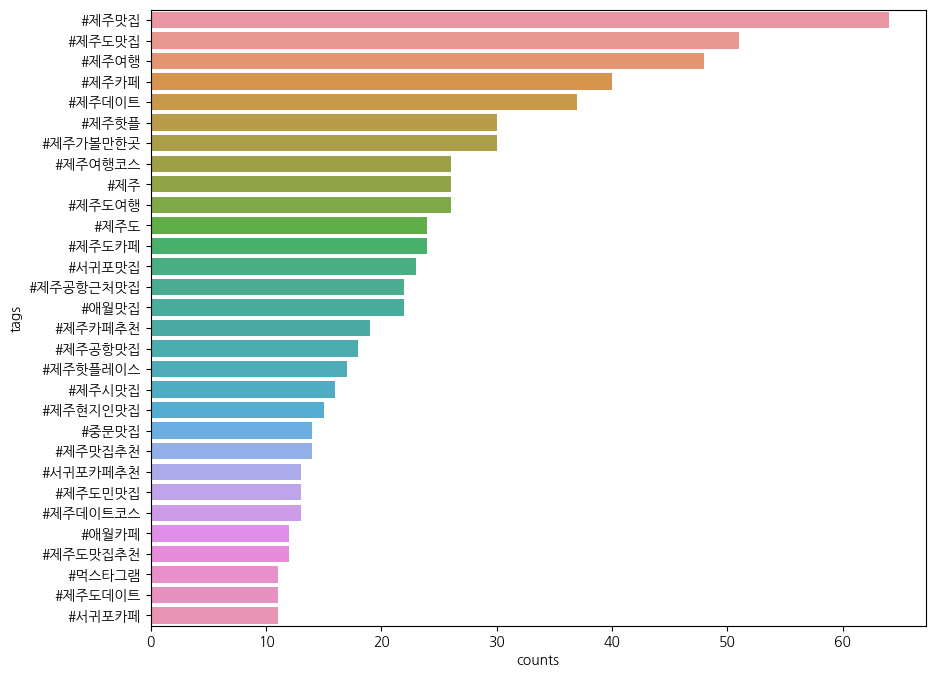

In [54]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))

sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [ ]:
!pip install wordcloud

In [55]:
# 워드 클라우드를 위한 패키지 불러오기
from wordcloud import WordCloud
import platform

In [56]:
# 워드 클라우드에 필요한 글꼴 지정
# 윈도우의 경우
if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
# Mac 의 경우
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

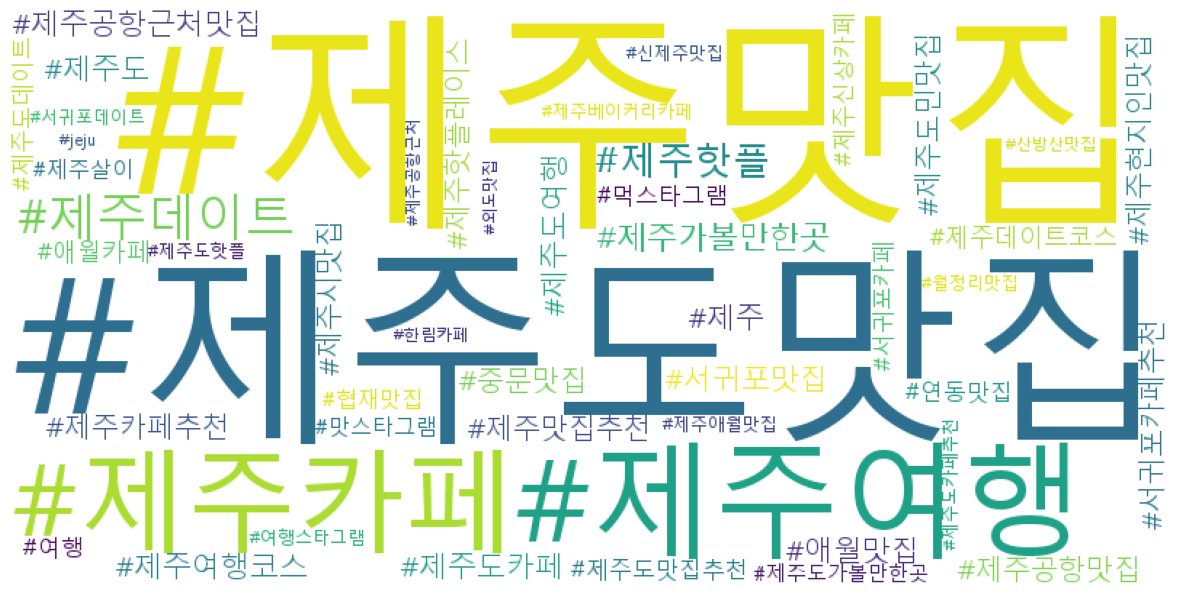

In [59]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
# 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('./tag-wordcloud.png')

* generate_from_frequencies() 함수에 tag_counts_selected 데이터를 넣어 워드클라우드 생성
* relative_scaling: 0에 가까울수록 빈도수의 순위에 1에 가까울수록 빈도수에 더 큰 영향을 보임
* 워드 클라우드를 실행할 때마다 배치, 색상 등은 무작위로 만들어지기에 표현하기 적합한 그림이 나올 때까지 만들어 사용하는 것이 좋다

## 지도 시각화

* folium 라이브러리 활용
* folium은 웹 기반 지도를 만들기 때문에 웹 환경에서만 지도 확인 가능, 지도는 웹으로 저장 후 확인이 가능하다.

In [60]:
# 지도 시각화
# 크롤링 된 데이터에서 위치 정보가 저장되어 있는 place를 선택한 뒤
# value_counts() 함수를 통해 빈도수 집계
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주                           25
Jeju-do                           5
제주도                               5
맛집탐방                              3
잔물결                               3
                                 ..
하이엔드 제주                           1
Bearpine coffee                   1
마담나탈리소셜클럽                         1
우도 牛岛 Udo Island, South Korea     1
손방둥이 공방                           1
Name: place, Length: 80, dtype: int64

In [61]:
# pandas 데이터프레임의 형태로 저장
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,25
Jeju-do,5
제주도,5
맛집탐방,3
잔물결,3


In [62]:
location_counts_df.to_excel('./location_counts.xlsx')

In [63]:
# 위치 정보만 선택 후 list형태로 변환한 뒤 저장
locations = list(location_counts.index)
locations

['제주도 제주',
 'Jeju-do',
 '제주도',
 '맛집탐방',
 '잔물결',
 '모던돔베 제주노형본점',
 'All that JEJU (올댓제주)',
 '제주도 Jeju Island',
 '제주 함덕 서우봉 해변',
 '제주도 제주시',
 'Parnas Hotel Jeju - 파르나스 호텔 제주',
 '우진해장국',
 '르토아 베이스먼트',
 '봉개동',
 '그러므로part.2',
 '카페 인어',
 '제주도립미술관',
 '딜레탕트',
 '경상남도 창원',
 '에이투비 A to B',
 '애월해안도로',
 '전주동물원',
 '전농로',
 '환상의 섬 Jeju Island',
 'Orrrn_official',
 '한담해변',
 '신산공원',
 'groundseesaw 그라운드시소 성수',
 '제주올레18코스',
 '오션갤러리 호텔앤리조트',
 '카페도도다',
 '대흘리',
 '제주참숯가마',
 '조천읍 와흘리',
 '바닐라파레트',
 '숙성도',
 'Hidden Cliff / 히든 클리프',
 '위즈커피',
 'Sinchang Windmill Coastal Road',
 '제주도 서귀포',
 'Jeju Island, South Korea - 제주도',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '전농로 벚꽃축제',
 '제주탑동골목',
 '제주도 서귀포시 성산읍',
 '서홍정원',
 '제주 협재 해수욕장',
 'Sing Sing EAT',
 '김녕오라이',
 '도토리키친',
 '제주 아살람레스토랑 Jeju Halal Restaurant Asalam',
 '시흥 해녀의 집',
 '스페인식당 그라나다',
 '섭지코지로',
 '제주시 외도동',
 '제주도 Jejudo',
 '로드129',
 '가시리 꽃길',
 '취향의섬',
 '제주시청에서',
 '서귀포',
 '올레  2코스 (Olle Route 2)',
 '에코랜드 테마파크 / Eco Land Theme Park',
 '에코랜드테마파크',
 'Umu Pudding , 우무',
 '제주

In [64]:
# 카카오 키워드 검색 API로 위치 정보 가져오기
# 패키지 불러오기
import requests

In [65]:
# 예시
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
}
# url 주소에 정보를 요청(header에 저장된 인증키값을 전달)하고, 요청 후 받은 결과를 json 형태로 불러옴
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [72]:
# 카카오 키워드 검색 API로 위치 정보 검색 함수
def find_places(searching):
    # 접속 URL
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
    }
    # API 요청 & 정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # 필요한 정보 입력
    # 최대 5개 정보가 저장되어 넘어오고, 그 중 첫번째 결과를 활용
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    # 장소명, x좌표, y좌표, 검색어를 리스트형태로 저장
    data = [name, x, y, searching]
    
    return data

In [73]:
# 진행사항 모니터링 가능한 패키지
from tqdm import tqdm_notebook
import time

In [76]:
# 인스타그램 데이터의 위치정보 검색
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        # 과도하게 빠른 요청 때문에 차단 오류 발생 가능성 방지
        time.sleep(0.5)
    except:
        pass
    
locations_inform

C:\Users\chunc\AppData\Local\Temp\ipykernel_21808\1408201311.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/80 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['산야초문화탐방', '127.66591846193258', '37.967606025489005', '맛집탐방'],
 ['스튜디오 잔물결', '126.830266163806', '37.5588924894798', '잔물결'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 함덕 서우봉 해변'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '제주도 제주시'],
 ['우진해장국', '126.52000128027187', '33.51151689656457', '우진해장국'],
 ['르토아베이스먼트', '126.8442963119275', '33.532984763900366', '르토아 베이스먼트'],
 ['절물자연휴양림', '126.628011263739', '33.4391525898214', '봉개동'],
 ['그러므로 파트2', '126.4859476928797', '33.46849065901183', '그러므로part.2'],
 ['카페 인어', '126.27641560521317', '33.44046660347766', '카페 인어'],
 ['제주도립미술관', '126.489644694081', '33.4525846506737', '제주도립미술관'],
 ['딜레탕트', '126.628423399481', '33.535091151792', '딜레탕트'],
 ['경남 마산로봇랜드', '128.5870460366396', '35.07712259000571', '경상남도 

In [77]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./locations.xlsx', index = False)

In [78]:
# 게시량
location_counts_df = pd.read_excel('./location_counts.xlsx', index_col = 0)
# 위치 정보
location_inform_df = pd.read_excel('./locations.xlsx')

In [79]:
location_data = pd.merge(locations_inform_df, location_counts_df, how = 'inner', left_on = 'name_official', right_index = True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
0,제주도,126.54587355630036,33.379777816446165,제주도 제주,5
1,제주도,126.54587355630036,33.379777816446165,제주도,5
4,제주도,126.54587355630036,33.379777816446165,제주도 Jeju Island,5
7,우진해장국,126.52000128027187,33.51151689656457,우진해장국,2
11,카페 인어,126.27641560521317,33.44046660347766,카페 인어,1


In [80]:
# 동일한 name_official을 가지는 데이터의 인스타그램 게시 횟수 합치기
location_data = location_data.pivot_table(index = ['name_official', '경도', '위도'], values = 'place', aggfunc = 'sum')
location_data.head()

,,,place
name_official,경도,위도,
김녕오라이,126.75519835631692,33.557758067192836,1
너븐,126.574103781235,33.2453333881799,1
닭머르,126.61189693619232,33.53647489410832,1
딜레탕트,126.628423399481,33.535091151792,1
로드129,126.321048106969,33.4643081022978,1


In [81]:
# 병합한 데이터 저장
location_data = location_data.reset_index()
location_data.to_excel('location_inform.xlsx')

In [82]:
# 지도 표시
import folium

In [83]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [84]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count) * 2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    # 원을 생성(위치, 크기, 색상, 원 이름)
    folium.CircleMarker((long, lat), radius = size, color = 'red', popup = name).add_to(map_jeju)
    
map_jeju

In [85]:
# 지도 저장
map_jeju.save('jeju.html')

In [86]:
# cluster를 이용하여 지도 표시
from folium.plugins import MarkerCluster

In [87]:
locations = []
names = []
for i in range(len(location_data)):
    # 행 하나씩
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
    
icon_create_function = """\
function(cluster){
    return L.divIcon({
    html:'<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconsize: new L.point(30, 30)
    });
}"""

In [88]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [89]:
marker_cluster = MarkerCluster(
    locations = locations, popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [90]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [91]:
# 지도 저장
map_jeju2.save('jeju_cluster.html')